
 IMPORTING BASIC LIBRARIES



In [11]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


 LOAD THE DATASET



In [12]:
data = pd.read_csv("C:/Users/sidra fathima/Downloads/spam.csv",encoding = 'latin-1',engine = "python",usecols =['v1','v2'])

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
data.shape

(5572, 2)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
data.dtypes

v1    object
v2    object
dtype: object




DATA PREPROCESSING



In [18]:
#import library
import re
import string
#function to process the text
def cleaner(text):
    #converts texts into lowercase
    text = text.lower()
    #remove all substrings enclosed in square brackets from the text
    text = re.sub('\[.*?\]', '',text)
    #removes non word characters
    text = re.sub("\\W"," ",text)
    #removes URLs
    text = re.sub('https?://\S+\www\.\S+','', text)
    #removes HTML tags
    text = re.sub('<.*?>+','', text)
    #removes punctuations
    text = re.sub('[%s]'% re.escape(string.punctuation),'', text)
    #removes new line characters
    text = re.sub('\n','', text)
    #removes all substrings containing at least one digit from the text
    text = re.sub('\W+\d\w*', '',text)
    return text

In [19]:
#apply the wordopt function to each text element in the data
data['v2'] = data['v2'].apply(cleaner)

In [20]:
data.head()

,v1,v2
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...




DATA VISUALIZATION



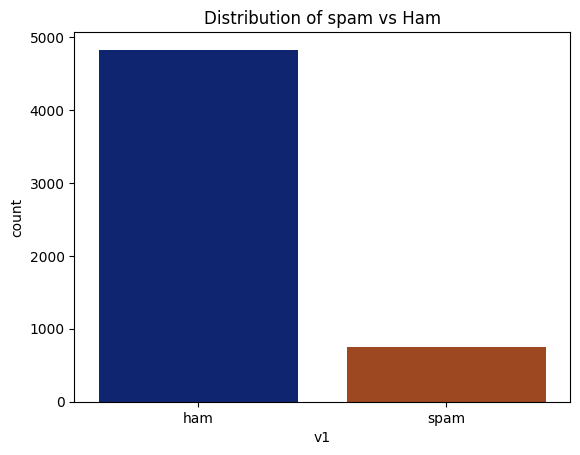

In [21]:
#create a count plot to visualize the distribution of labels in the data
sns.countplot(x='v1',data=data,palette='dark')

#set the title of the plot to describe its content
plt.title('Distribution of spam vs Ham')

#display the plot 
plt.show()

In [22]:
!pip install wordcloud

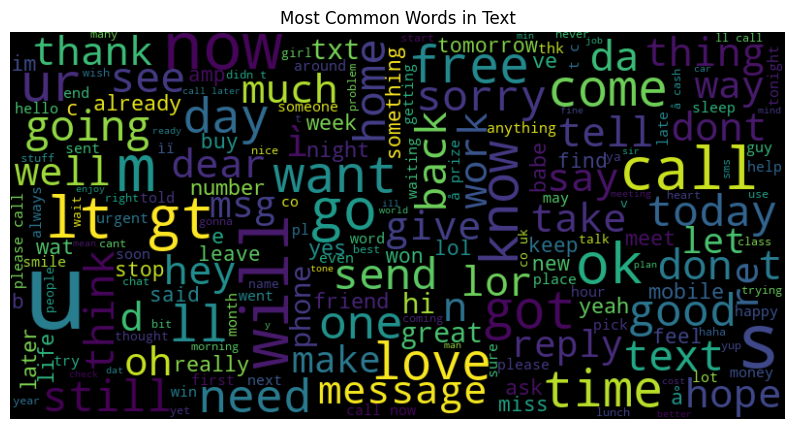

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(data['v2']))
#Displaying the word cloud with some features
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Most Common Words in Text')
plt.show()

FEATURE ENGINEERING

In [24]:
#importing library
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance to convert text data into a matrix of TF-IDF features
vectorization = TfidfVectorizer(max_features = 5000)

# Fit the vectorizer to the data and transform the text data
X = vectorization.fit_transform(data['v2'])

# Get the label values from the data as a numpy array
y = data['v1'].values


DIVIDE X and Y



In [25]:
X = vectorization.fit_transform(data['v2']).toarray()
y = data['v1'].values



 SPLITTING INTO TRAIN AND TEST PARTS



In [26]:
#importing library
from sklearn.model_selection import train_test_split

#splits the dataset into training and testing sets with a 80-20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [27]:
# checking count of the dataset
class_frequencies = data['v1'].value_counts()

# Displaying the count
print(class_frequencies)

v1
ham     4825
spam     747
Name: count, dtype: int64


In [28]:
#importing library
from imblearn.over_sampling import SMOTE
# Initialize SMOTE with a fixed random state
smote = SMOTE(random_state=42)

# Generate resampled datasets to balance class distribution.
X_resampled,y_resampled = smote.fit_resample(X,y)

In [29]:
print("resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

resampled class distribution:
ham     4825
spam    4825
Name: count, dtype: int64



         TRAINING MODEL

         



Logistic Regression


In [30]:
# importing library
from sklearn.linear_model import LogisticRegression
# Loading model in variable
LR = LogisticRegression(penalty = 'l2',C= 0.01)

In [31]:
# Training the model using x_train and y_train
LR.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [32]:
pred_LR = LR.predict(X_test)

In [33]:
#importing library
from sklearn.metrics import accuracy_score

# Calculates Accuracy of Training Data
train_accuracy = accuracy_score(y_train,LR.predict(X_train))
print(train_accuracy)

0.8660533991474085


In [34]:
# Predicts Accuracy of Testing data
y_pred = LR.predict(X_test)

#Calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,y_pred)

# Displays the Accuracy of Testing Data
print(test_accuracy)

0.8654708520179372


In [50]:
#importing library
from sklearn.metrics import classification_report

# Displays Classification report
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115




SUPPORT VECTOR MACHINE


In [51]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')

In [53]:
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred = SVM.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

# Calculates Accuracy of Training Data
train_accuracy = accuracy_score(y_train,SVM.predict(X_train))
print(train_accuracy)

0.9955126766883554


In [56]:
# Predicts Accuracy of Testing data
y_pred = SVM.predict(X_test)

#Calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,y_pred)

# Displays the Accuracy of Testing Data
print(test_accuracy)

0.9802690582959641


In [57]:
#importing library
from sklearn.metrics import classification_report

# Displays Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115




NAVIE BAYES



In [58]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [59]:
NB.fit(X_train,y_train)

GaussianNB()

In [60]:
NB_pred = NB.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

# Calculates Accuracy of Training Data
train_accuracy = accuracy_score(y_train,NB.predict(X_train))
print(train_accuracy)

0.9329145164909132


In [62]:
# Predicts Accuracy of Testing data
y_pred = NB.predict(X_test)

#Calculates Accuracy of Testing data
test_accuracy = accuracy_score(y_test,y_pred)

# Displays the Accuracy of Testing Data
print(test_accuracy)

0.8932735426008969


In [63]:
#importing library
from sklearn.metrics import classification_report

# Displays Classification report
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

         ham       0.98      0.89      0.94       965
        spam       0.57      0.89      0.69       150

    accuracy                           0.89      1115
   macro avg       0.77      0.89      0.81      1115
weighted avg       0.93      0.89      0.90      1115





CONCLUSION



Among all the three Support Vector Machine gives best Accuracy